# Interpretation, Interpretability and Explainability; and Why Does It All Matter?

In [1]:
import math
import requests
from bs4 import BeautifulSoup
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

What is machine learning interpretation?

ML model interpretation enables you to understand the logic behind a decision and trace back the detailed steps of the process behind the model logic. The main goal of it is to *explain the meaning of algorithm*.

## Example on simple regression task

Dataset contains records of the weights and heights of the 18-year olds. The weight of the student can be estimated using this formula:

$ weight = \beta_{0} + \beta_{1}height $

In [2]:
url = 'http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights'
page = requests.get(url)

soup = BeautifulSoup(page.content, 'html.parser')
tbl = soup.find("table",{"class":"wikitable"})

height_weight_df = pd.read_html(str(tbl))[0][['Height(Inches)','Weight(Pounds)']]
height_weight_df.head()

,Height(Inches),Weight(Pounds)
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30


In [3]:
num_records = height_weight_df.shape[0]
print(num_records)

200


In [4]:
x = height_weight_df['Height(Inches)'].values.reshape(num_records, 1)
y = height_weight_df['Weight(Pounds)'].values.reshape(num_records, 1)

### Fitting model

In [5]:
model = linear_model.LinearRegression()
model.fit(x, y)

LinearRegression()

Extract the intercept and coefficients.

In [6]:
print("ŷ = " + str(model.intercept_[0]) + " + " + str(model.coef_.T[0][0]) + " x₁")

ŷ = -106.02770644878137 + 3.4326761292716297 x₁


It tells that, on average, for every additional pound, there are 3.4 inches of height. But this model is not perfect, it is making errors. THe difference between prediction and real values are errors or residuals.

In [7]:
y_pred = model.predict(x)
mae = mean_absolute_error(y, y_pred)
print(mae)

7.7587373803882205


It means that, on average, the prediction is 7.75 pounds from the actual value.

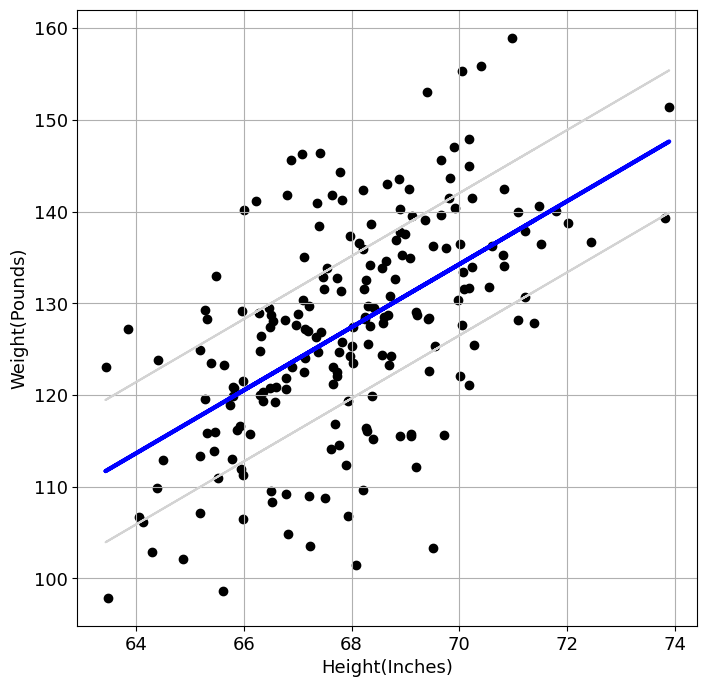

In [8]:
plt.figure(figsize=(8, 8))
plt.rcParams.update({'font.size': 13})
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)
plt.plot(x, y_pred + mae, color='lightgray')
plt.plot(x, y_pred - mae, color='lightgray')
plt.title('')
plt.xlabel('Height(Inches)')
plt.ylabel('Weight(Pounds)')
plt.grid(True)
plt.show()

Plotting errors can be essential to understand the mistakes made ny the model. Here, we can see that model made some errors much bigger than 7.75 pounds.

### Pearson correlation

It measures the association between two variables using their covariance divided by their standard deviation. It is a number between -1 (negative relation) and 1 (positive relation), where 0 means that there are no relation between two variables. 

In [9]:
corr, pval = pearsonr(x[:,0], y[:,0])
print(corr)

0.5568647346122995


The second value returned by `pearsonr` is *p-value* for testing non-correlation.

In [10]:
print(pval < 0.05)

True


## Can we trust the model?

Making predictions based on  one variable its not sufficient. We can add more, but we have to consider if they will be helpful, and not add same bias to predictions. For instance:

* selection bias - if we train model on data from men and want to make predictions for females
* omitted variable bias - we didn't include variables which explain other variables (for example pregnancy when we are calculating weight)

### FAT

The three main concepts of the interpretable ML:

* Fairness - are predictions made without discernible bias?
* Accountability - can we trace these predictions reliably back to something or someone?
* Transparency - can we explain how and why predictions are made?

## Interpretability and Explainability

Interpretability is the extent to which humans can understand the cause and effect, and input and output of ML model. It try to answer the question: *why does an input to a model produce a specific output?* Model has a high level of interpretability when you can describe in a human-interpretable its inference.

Explainability is a wider term, it goes deeper and demands human-friendly explanations for a model's inner working, and the model training process, not just only model inference. There are three types of transparency:
 
 * Model transparency - explaining how model is trained step by step
 * Design transparency - explaining choices made, such as model architecture and hyperparameters
 * Algorithmic transparency -  explaining automated optimizations, such as grid search or optimization.

## Black-box and white-box models

**Black box** refers to a system in which only the input and outputs are observable, and you cannot understand what is transforming the inputs into the outputs.

**White box** are transparent and they achieve total (or near-total) interpretation transparency.

## Ethical aspects

There is an accountability problem, very often is hard to say if mistake made by the model is caused by programmer or it occurs because of the characteristic of training data. The second one can lead to following biases:

* sample bias - when sample doesn't represent the environment accurately
* exclusion bias - when you omit features or groups that are crucial for the problem
* prejudice bias - when stereotypes influence data
* measurement bias - when fault measurement distort data

## Business aspect

Incorporating interpretability into ML workflows can indirectly benefit company by decreasing lawsuits and lousy decision-making or by improving image of the company.